<a href="https://colab.research.google.com/github/linhv0/My-Data-Analysis-Small-Projects/blob/main/Natural_Language_Processing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd


In [6]:
from google.colab import files
uploaded = files.upload()


Saving data_uk_nlp_quiz.csv.gz to data_uk_nlp_quiz.csv (1).gz


In [9]:
data = pd.read_csv('data_uk_nlp_quiz.csv.gz', sep=',', compression = 'gzip', dtype=str)

In [10]:
data

,tweet_id,user_id,text,date,lang
0,1526300954299088900,757880,"""@MundellaFoxes Edgar made the most of the sun...",1652733479,en
1,1528107264338542592,757880,"""Catching up with today's #Giro2022 stage. Thi...",1653164137,en
2,1529895796249870336,757880,"""RT @UXLondon: Clearleft are delighted to offe...",1653590556,en
3,1530235766974169090,757880,"""\""Canadian Riesling?\"" https://t.co/EOnbUOuSRQ""",1653671611,en
4,1532420896626987009,757880,"""@AlexanderMcC We were in Belgium in April and...",1654192587,en
...,...,...,...,...,...
567328,1533751368791498752,1208495999825711104,"""RT @twunkletoes1: Who likes chubby boys?🐷 htt...",1654509796,en
567329,1533751972326739968,1208495999825711104,"""RT @MasterMaxWorld: Hahah the way they both c...",1654509940,en
567330,1533752476784107523,1208495999825711104,"""RT @MasterMaxWorld: Look who’s here yeahhhhh ...",1654510060,en
567331,1533759208637743106,1208495999825711104,"""RT @RubbxrAlex: My happy place https://t.co/7...",1654511665,en


In [11]:
# Sort the values by 'user_id' and 'tweet_id'.
data = data.sort_values(by=['user_id', 'tweet_id']).reset_index(drop=True)
data


,tweet_id,user_id,text,date,lang
0,1525800073946439683,1000229839,"""RT @nessieslake: LET'S GO NORWAYYYY\n#Eurovis...",1652614060,en
1,1525827457496096771,1000229839,"""RT @surenlicious: I'm Suren 💕 Mixed Asian/bla...",1652620589,en
2,1525827479923040257,1000229839,"""RT @juliennekparks: #BlackFaeDay is so sweet,...",1652620594,en
3,1525833899250700294,1000229839,"""RT @mulemount: redraw https://t.co/9V1DabyJTC""",1652622124,en
4,1525833921514151936,1000229839,"""RT @starcre8tor: why do we always have the sa...",1652622130,en
...,...,...,...,...,...
567328,1536315209148669952,999729916005572608,"""@kikislider sound advice lad ty""",1655121063,en
567329,1536378842474065922,999729916005572608,"""RT @Reductress: 'I Don’t Know Who Needs To He...",1655136235,en
567330,1536402081774555136,999729916005572608,"""i got my outfit for the award ceremony today....",1655141775,en
567331,1536404413413306369,999729916005572608,"""Me and who me and who me and who https://t.co...",1655142331,en


In [12]:
#users are in the dataset
data['user_id'].nunique()

5288

In [13]:
# Convert date to datetime
data['date'] = pd.to_datetime(data['date'], unit='s')
print(data['date'].min())
print(data['date'].max())

<ipython-input-13-bae18c2b46e6>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['date'] = pd.to_datetime(data['date'], unit='s')


2022-05-15 00:00:02
2022-06-13 22:59:59


In [14]:
# count the number of observations per day
cols = ['date', 'tweet_id']
daily_data = data[cols].groupby(pd.Grouper(key='date', freq='D')).count().reset_index()
print(daily_data.head(5))

        date  tweet_id
0 2022-05-15     17523
1 2022-05-16     19095
2 2022-05-17     17593
3 2022-05-18     18152
4 2022-05-19     18473


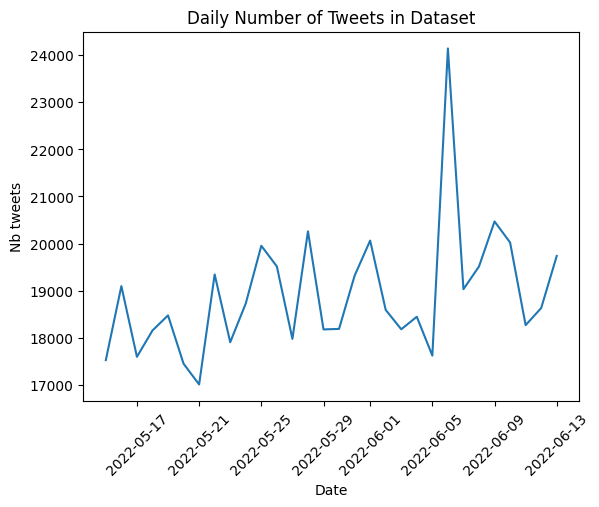

In [15]:
import matplotlib.pyplot as plt

# Create the figure object using the figure function from matplotlib.
fig = plt.figure()
# Create the plot location.
ax1 = fig.add_subplot(1,1,1)
# Create the plot.
ax1.plot(daily_data['date'], daily_data['tweet_id'])
ax1.set_title('Daily Number of Tweets in Dataset')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nb tweets')
ax1.tick_params(axis='x', rotation=45)
plt.show()

In [16]:

# Convert 'text' to lower case, assign the output to a new variable 'text_clean'.
data['text_clean'] = data['text'].str.lower()

# Create a new column 'hashtag'
data['hashtag'] = data['text_clean'].str.findall('#\S+')

print(data['hashtag'].head(5))

0     [#eurovision]
1                []
2    [#blackfaeday]
3                []
4                []
Name: hashtag, dtype: object


In [17]:

has = []
# Iterate over each element of 'hashtag'. Append the elements to 'has' that have a strictly positive number of elements.
for ele in data['hashtag']:
  if len(ele) > 0:
    has.append(ele)
# Flatten the list 'has'.
flat_has = [item for sublist in has for item in sublist]

In [18]:
# create a list of all the hashtags together (separated by white spaces).
flat_has = ' '.join(flat_has)

In [19]:
print(flat_has)

#eurovision #blackfaeday #painting #tutorial #dtiys #appiedtiys #dtiyschallenge #mermay #art #oc #temtem #temtem #mermay #pjoseriesart #percyjackson #mermay #mermay #mermay2022 #illustration #oc #fanart #ryugagotoku #monkiekid #sunwukong #lmk #…" #temtem #fanart #lozoot #fanart #mermay #mermay2022 #dndcharacter #temtem #ourflagmeansdeath #worldgothday #eren #snk #erenjaeger #temtem #キスの日\n\n[ #chipndalerescuerangers #artist #tr…" #blacktober #teb20k #jadekingdoms #procreate #illustration #keytomyheart #…" #teentitans #sona #originalcharacter #cartoonnetworkpalette #digitalart #myoc #originalcharacter #originalcharacterart #digital #digitaldra…" #wip #nostraightroads #artph #mermay2022! #webtooncanvas! #drawwithcanvas #mermay #caturday! #wip #blackedit #dnd #dungeonsanddragons #cartoonnetworkpalette #cartoonnetworkpalettechallenge #toonjune2022 #pokemon #pokemonscarletandviolet #nemona #p…" #pokemonscarletviolet #pokemon #fuecoco #アルセウス #temtem #pridemonth #toonjune2022 #toonjune2022 #c

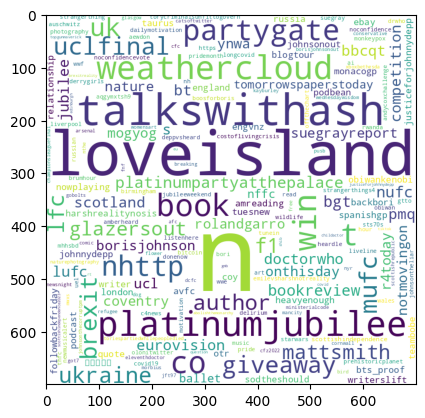

In [20]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=700,
                      height=700,
                      background_color='white',
                      collocations=False)

# Generate the word cloud.
wordcloud.generate(flat_has)
plt.imshow(wordcloud)


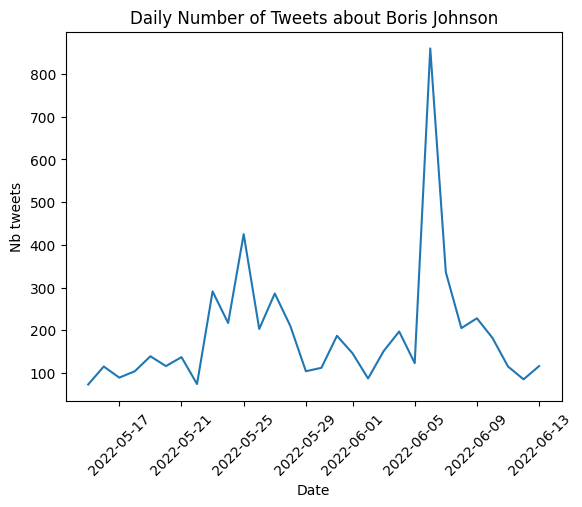

In [21]:
#select the tweets that are related to Boris Johnson.
data['boris_johnson'] = data['text_clean'].str.contains('boris johnson')

# Create 'data_boris_johnson', a sub-sample that contains the tweets mentioning
# Boris Johnson, only.
data_boris_johnson = data[data['boris_johnson'] == True].reset_index(drop=True)


# create a plot of daily number of tweets about Boris Johson
cols = ['date', 'boris_johnson']
daily_data_boris_johnson = data_boris_johnson[cols].groupby(pd.Grouper(key='date', freq='D')).count().reset_index()

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(daily_data_boris_johnson['date'], daily_data_boris_johnson['boris_johnson'])
ax1.set_title('Daily Number of Tweets about Boris Johnson')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nb tweets')
ax1.tick_params(axis='x', rotation=45)
fig.show()




In [22]:
data_boris_johnson
data_boris_johnson['user_id'].nunique()

708

In [24]:
from textblob import TextBlob
#create a new column 'sentiment' which records the sentiment of the tweet
# Create the empty list.
sentiment = []

for tweet in data_boris_johnson['text_clean']:
  tweet_blob = TextBlob(tweet)
  score = tweet_blob.sentiment.polarity
  sentiment.append(score)

data_boris_johnson['sentiment'] = sentiment

print(data_boris_johnson.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       5713 non-null   object        
 1   user_id        5713 non-null   object        
 2   text           5713 non-null   object        
 3   date           5713 non-null   datetime64[ns]
 4   lang           5713 non-null   object        
 5   text_clean     5713 non-null   object        
 6   hashtag        5713 non-null   object        
 7   boris_johnson  5713 non-null   bool          
 8   sentiment      5713 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), object(6)
memory usage: 362.8+ KB
None


In [25]:


# Select the columns 'Date', 'user_id' and 'sentiment'.
cols = ['date', 'user_id', 'sentiment']

# aggregate the polarity scores by computing the mean by user and by day.
daily_users_sentiment = data_boris_johnson[cols].groupby(['user_id', pd.Grouper(key='date', freq='D') ]).mean().reset_index()
daily_users_sentiment

# we will use 'daily_users_sentiment' to compute the daily mean of the polarity scores and store the output as 'daily_sentiment'.
daily_sentiment = daily_users_sentiment[cols].groupby(pd.Grouper(key='date', freq='D'))['sentiment'].mean().reset_index()
daily_sentiment


,date,sentiment
0,2022-05-15,0.002113
1,2022-05-16,0.056304
2,2022-05-17,0.035190
3,2022-05-18,0.048608
4,2022-05-19,0.046659
5,2022-05-20,0.106338
6,2022-05-21,0.006992
7,2022-05-22,0.039522
8,2022-05-23,0.040411
9,2022-05-24,0.065748


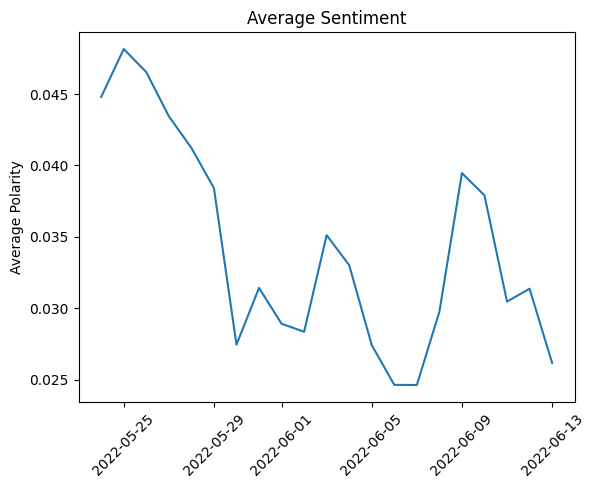

In [26]:
# create MA(10) graph (time series using a 10-day moving average)

daily_sentiment['sentiment'] = daily_sentiment['sentiment'].rolling(window=10).mean()

import datetime as dt

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(daily_sentiment['date'], daily_sentiment['sentiment'])

ax1.set_title('Average Sentiment')
ax1.set_ylabel('Average Polarity')

ax1.tick_params(axis='x', rotation=45)
plt.show()